In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
def create_metric(score, **kwargs):
    def apply_metric(y_true, y_pred):
        return score(y_true, y_pred, **kwargs)
    
    return apply_metric

def calculate_metric(model, subject_wise, metric, n=10000):
    folder = f"results/{'figshare-patients' if subject_wise else 'figshare'}/{model}"
    scores = list()
    for run in range(5):
        if model == "rocket":
            results = pd.read_csv(f"{folder}/{n}_kernels_run_{run}.csv")
        elif model == "minirocket":
            results = pd.read_csv(f"{folder}/{n}_features_run_{run}.csv")
        else:
            results = pd.read_csv(f"{folder}/run_{run}.csv")

        scores.append(metric(results["true"], results["pred"]))

    return np.array(scores)

def get_runtime(model, subject_wise, n=10000):
    folder = f"results/{'figshare-patients' if subject_wise else 'figshare'}/{model}"
    runtimes = list()
    for run in range(5):
        if model == "rocket":
            filename = f"{folder}/{n}_kernels_run_{run}_runtime.txt"
        elif model == "minirocket":
            filename = f"{folder}/{n}_features_run_{run}_runtime.txt"
        else:
            filename = f"{folder}/run_{run}_runtime.txt"

        with open(filename, "r") as f:
            runtimes.append(float(f.read()))

    return np.array(runtimes)

In [19]:
runtimes = get_runtime("minirocket", True)

print(f"{np.mean(runtimes):.2f} +- {np.std(runtimes):.2f}")

144.31 +- 0.03


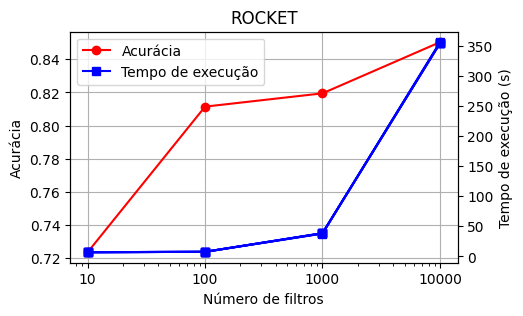

In [95]:
kernels = [10, 100, 1000, 10000]

rocket_acc = np.array([np.mean(calculate_metric("rocket", True, create_metric(accuracy_score), n)) for n in kernels])
rocket_run = np.array([get_runtime("rocket", True, n) for n in kernels])

fig, ax = plt.subplots(figsize=(5,3))

ax.set_title("ROCKET")
ax.grid()
ax.set_xlabel("Número de filtros")
ax.set_ylabel("Acurácia")
line1 = ax.plot(kernels, rocket_acc, "ro-")
ax.set_xscale("log")
ax.set_xticks(kernels, labels=map(str, kernels))
ax0 = ax.twinx()
ax0.set_ylabel("Tempo de execução (s)")
line2 = ax0.plot(kernels, rocket_run, "bs-")
ax.legend(line1 + line2, ["Acurácia", "Tempo de execução"])

plt.savefig("rocket_graph.pdf", bbox_inches="tight")

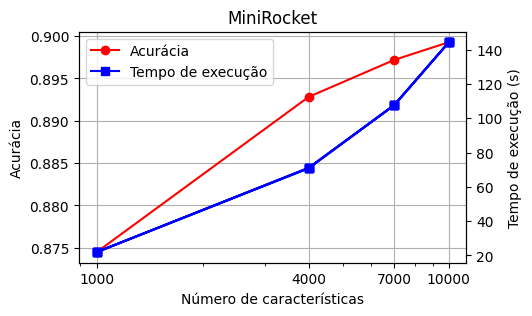

In [96]:
features = [1000, 4000, 7000, 10000]

minirocket_acc = np.array([np.mean(calculate_metric("minirocket", True, create_metric(accuracy_score), n)) for n in features])
minirocket_run = np.array([get_runtime("minirocket", True, n) for n in features])

fig, ax = plt.subplots(figsize=(5,3))

ax.set_title("MiniRocket")
ax.grid()
ax.set_xlabel("Número de características")
ax.set_ylabel("Acurácia")
line1 = ax.plot(features, minirocket_acc, "ro-")
ax.set_xscale("log")
ax.set_xticks(features, labels=map(str, features))
ax1 = ax.twinx()
ax1.set_ylabel("Tempo de execução (s)")
line2 = ax1.plot(features, minirocket_run, "bs-")
ax.legend(line1 + line2, ["Acurácia", "Tempo de execução"])

plt.savefig("minirocket_graph.pdf", bbox_inches="tight")


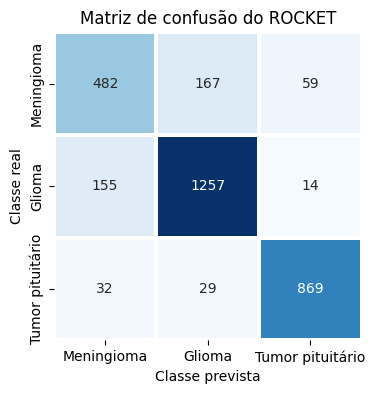

In [57]:
model = "rocket"
run = 0
n = 10000
patients = True

folder = f"results/{'figshare-patients' if patients else 'figshare'}/{model}"
if model == "rocket":
    results = pd.read_csv(f"{folder}/{n}_kernels_run_{run}.csv")
elif model == "minirocket":
    results = pd.read_csv(f"{folder}/{n}_features_run_{run}.csv")
else:
    results = pd.read_csv(f"{folder}/run_{run}.csv")

matrix = np.empty((3,3), dtype=int)

for i in range(3):
    for j in range(3):
        n = np.sum((results["true"] == i) & (results["pred"] == j))
        matrix[i,j] = n

fig, ax = plt.subplots(figsize=(4,4))

sns.heatmap(
    ax=ax,
    data=matrix,
    cmap="Blues",
    annot=True,
    fmt="d",
    vmin=0,
    cbar=False,
    square=True,
    xticklabels=["Meningioma", "Glioma", "Tumor pituitário"],
    yticklabels=["Meningioma", "Glioma", "Tumor pituitário"],
    linewidths=1.5
)

ax.set_title("Matriz de confusão do ROCKET")
ax.set_xlabel("Classe prevista")
ax.set_ylabel("Classe real")

plt.savefig("confusao_rocket.pdf", bbox_inches="tight")

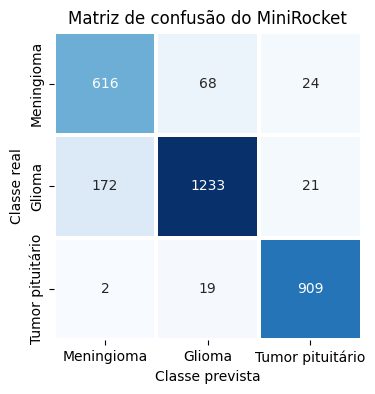

In [58]:
model = "minirocket"
run = 0
n = 10000
patients = True

folder = f"results/{'figshare-patients' if patients else 'figshare'}/{model}"
if model == "rocket":
    results = pd.read_csv(f"{folder}/{n}_kernels_run_{run}.csv")
elif model == "minirocket":
    results = pd.read_csv(f"{folder}/{n}_features_run_{run}.csv")
else:
    results = pd.read_csv(f"{folder}/run_{run}.csv")

matrix = np.empty((3,3), dtype=int)

for i in range(3):
    for j in range(3):
        n = np.sum((results["true"] == i) & (results["pred"] == j))
        matrix[i,j] = n

fig, ax = plt.subplots(figsize=(4,4))

sns.heatmap(
    ax=ax,
    data=matrix,
    cmap="Blues",
    annot=True,
    fmt="d",
    vmin=0,
    cbar=False,
    square=True,
    xticklabels=["Meningioma", "Glioma", "Tumor pituitário"],
    yticklabels=["Meningioma", "Glioma", "Tumor pituitário"],
    linewidths=1.5
)

ax.set_title("Matriz de confusão do MiniRocket")
ax.set_xlabel("Classe prevista")
ax.set_ylabel("Classe real")

plt.savefig("confusao_minirocket.pdf", bbox_inches="tight")

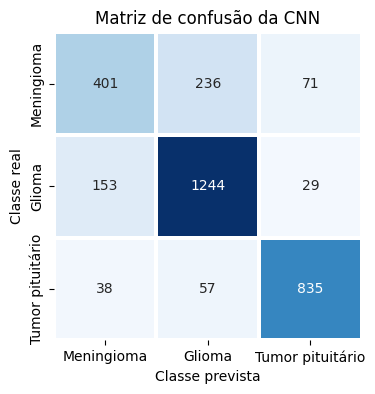

In [59]:
model = "cnn"
run = 0
n = 10000
patients = True

folder = f"results/{'figshare-patients' if patients else 'figshare'}/{model}"
if model == "rocket":
    results = pd.read_csv(f"{folder}/{n}_kernels_run_{run}.csv")
elif model == "minirocket":
    results = pd.read_csv(f"{folder}/{n}_features_run_{run}.csv")
else:
    results = pd.read_csv(f"{folder}/run_{run}.csv")

matrix = np.empty((3,3), dtype=int)

for i in range(3):
    for j in range(3):
        n = np.sum((results["true"] == i) & (results["pred"] == j))
        matrix[i,j] = n

fig, ax = plt.subplots(figsize=(4,4))

sns.heatmap(
    ax=ax,
    data=matrix,
    cmap="Blues",
    annot=True,
    fmt="d",
    vmin=0,
    cbar=False,
    square=True,
    xticklabels=["Meningioma", "Glioma", "Tumor pituitário"],
    yticklabels=["Meningioma", "Glioma", "Tumor pituitário"],
    linewidths=1.5
)

ax.set_title("Matriz de confusão da CNN")
ax.set_xlabel("Classe prevista")
ax.set_ylabel("Classe real")

plt.savefig("confusao_cnn.pdf", bbox_inches="tight")